**Tutotrial 1**

In this tutorial, we shall use famous Python packages to do basic data analysis. This includes Pandas, Sklearn and Pandas profiling package.

Run the following code to start installing Python packages.

In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1

Upload your data set file to Google Drive. I am uploading german_credit.arff file. We can also uplaod the CSV file but with the CSV file, we shall have to define categorical and numeric data types correctly. In the case of arff files, I have already defined the correct data types. This means you just need to run the following code snippet to load correct data types for the three dataset in this project..

In [2]:
from google.colab import files
uploaded = files.upload()

Saving churn.arff to churn.arff


In [3]:
import pandas as pd
from scipy.io import arff
import numpy as np

#data_file="german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
#data_file="bank.arff"
data_file="churn.arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
print(df.dtypes)



State                            object
Account Length                  float64
Area Code                        object
Phone Number                     object
Inter Plan                       object
VoiceMail Plan                   object
No of Vmail Mesgs               float64
Total Day Min                   float64
Total Day calls                 float64
Total Day Charge                float64
Total Evening Min               float64
Total Evening Calls             float64
Total Evening Charge            float64
Total Night Minutes             float64
Total Night Calls               float64
Total Night Charge              float64
Total Int Min                   float64
Total Int Calls                 float64
Total Int Charge                float64
No of Calls Customer Service    float64
Churn                            object
dtype: object


In [4]:
# Let's display first 10 records 
df.head(10)


State  Account Length Area Code Phone Number Inter Plan VoiceMail Plan  \
0    OH           107.0      A415     371-7191         no            yes   
1    NJ           137.0      A415     358-1921         no             no   
2    OH            84.0      A408     375-9999        yes             no   
3    OK            75.0      A415     330-6626        yes             no   
4    AL           118.0      A510     391-8027        yes             no   
5    MA           121.0      A510     355-9993         no            yes   
6    MO           147.0      A415     329-9001        yes             no   
7    LA           117.0      A408     335-4719         no             no   
8    WV           141.0      A415     330-8173        yes            yes   
9    IN            65.0      A415     329-6603         no             no   

   No of Vmail Mesgs  Total Day Min  Total Day calls  Total Day Charge  ...  \
0               26.0          161.6            123.0             27.47  ...   
1                0.0          243.4            114.0             41.38  ...   
2                0.0          299.4             71.0             50.90  ...   
3                0.0          166.7            113.0             28.34  ...   
4                0.0          223.4             98.0             37.98  ...   
5               24.0          218.2             88.0             37.09  ...   
6                0.0          157.0             79.0             26.69  ...   
7                0.0          184.5             97.0             31.37  ...   
8               37.0          258.6             84.0             43.96  ...   
9                0.0          129.1            137.0             21.95  ...   

   Total Evening Calls  Total Evening Charge  Total Night Minutes  \
0                103.0                 16.62                254.4   
1                110.0                 10.30                162.6   
2                 88.0                  5.26                196.9   
3                122.0                 12.61                186.9   
4                101.0                 18.75                203.9   
5                108.0                 29.62                212.6   
6                 94.0                  8.76                211.8   
7                 80.0                 29.89                215.8   
8                111.0                 18.87                326.4   
9                 83.0                 19.42                208.8   

   Total Night Calls  Total Night Charge  Total Int Min  Total Int Calls  \
0              103.0               11.45           13.7              3.0   
1              104.0                7.32           12.2              5.0   
2               89.0                8.86            6.6              7.0   
3              121.0                8.41           10.1              3.0   
4              118.0                9.18            6.3              6.0   
5              118.0                9.57            7.5              7.0   
6               96.0                9.53            7.1              6.0   
7               90.0                9.71            8.7              4.0   
8               97.0               14.69           11.2              5.0   
9              111.0                9.40           12.7              6.0   

   Total Int Charge  No of Calls Customer Service  Churn  
0              3.70                           1.0  FALSE  
1              3.29                           0.0  FALSE  
2              1.78                           2.0  FALSE  
3              2.73                           3.0  FALSE  
4              1.70                           0.0  FALSE  
5              2.03                           3.0  FALSE  
6              1.92                           0.0  FALSE  
7              2.35                           1.0  FALSE  
8              3.02                           0.0  FALSE  
9              3.43                           4.0   TRUE  

[10 rows x 21 columns]

In [5]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         3333 non-null   object 
 1   Account Length                3333 non-null   float64
 2   Area Code                     3333 non-null   object 
 3   Phone Number                  3333 non-null   object 
 4   Inter Plan                    3333 non-null   object 
 5   VoiceMail Plan                3333 non-null   object 
 6   No of Vmail Mesgs             3333 non-null   float64
 7   Total Day Min                 3333 non-null   float64
 8   Total Day calls               3333 non-null   float64
 9   Total Day Charge              3333 non-null   float64
 10  Total Evening Min             3333 non-null   float64
 11  Total Evening Calls           3333 non-null   float64
 12  Total Evening Charge          3333 non-null   float64
 13  Tot

In [6]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

Account Length  No of Vmail Mesgs  Total Day Min  Total Day calls  \
count     3333.000000        3333.000000    3333.000000      3333.000000   
mean       101.064806           8.099010     179.775098       100.435644   
std         39.822106          13.688365      54.467389        20.069084   
min          1.000000           0.000000       0.000000         0.000000   
25%         74.000000           0.000000     143.700000        87.000000   
50%        101.000000           0.000000     179.400000       101.000000   
75%        127.000000          20.000000     216.400000       114.000000   
max        243.000000          51.000000     350.800000       165.000000   

       Total Day Charge  Total Evening Min  Total Evening Calls  \
count       3333.000000        3333.000000          3333.000000   
mean          30.562307         200.980348           100.114311   
std            9.259435          50.713844            19.922625   
min            0.000000           0.000000             0.000000   
25%           24.430000         166.600000            87.000000   
50%           30.500000         201.400000           100.000000   
75%           36.790000         235.300000           114.000000   
max           59.640000         363.700000           170.000000   

       Total Evening Charge  Total Night Minutes  Total Night Calls  \
count           3333.000000          3333.000000        3333.000000   
mean              17.083540           200.872037         100.107711   
std                4.310668            50.573847          19.568609   
min                0.000000            23.200000          33.000000   
25%               14.160000           167.000000          87.000000   
50%               17.120000           201.200000         100.000000   
75%               20.000000           235.300000         113.000000   
max               30.910000           395.000000         175.000000   

       Total Night Charge  Total Int Min  Total Int Calls  Total Int Charge  \
count         3333.000000    3333.000000      3333.000000       3333.000000   
mean             9.039325      10.237294         4.479448          2.764581   
std              2.275873       2.791840         2.461214          0.753773   
min              1.040000       0.000000         0.000000          0.000000   
25%              7.520000       8.500000         3.000000          2.300000   
50%              9.050000      10.300000         4.000000          2.780000   
75%             10.590000      12.100000         6.000000          3.270000   
max             17.770000      20.000000        20.000000          5.400000   

       No of Calls Customer Service  
count                   3333.000000  
mean                       1.562856  
std                        1.315491  
min                        0.000000  
25%                        1.000000  
50%                        1.000000  
75%                        2.000000  
max                        9.000000

# *There are two sections in this tutorial. First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding. German Credit card data set would work in both sections and other datasets would require their string values to be encoded into numeric first, so they will work with only Section 2.* 

# Section 1
### Test Section 1 with only German credit card dataset.


**Let's develop a decison tree in Python**

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1) 

Below is the code to train the decision tree. I am setting max depth of the tree to 5, you can choose to change it or remove it.

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


If you want to learn more about any Python statement just use help function; e.g., here  I am displaying help on decision tree

In [ ]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

Let's plot the ree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

class Names ['1' '0']


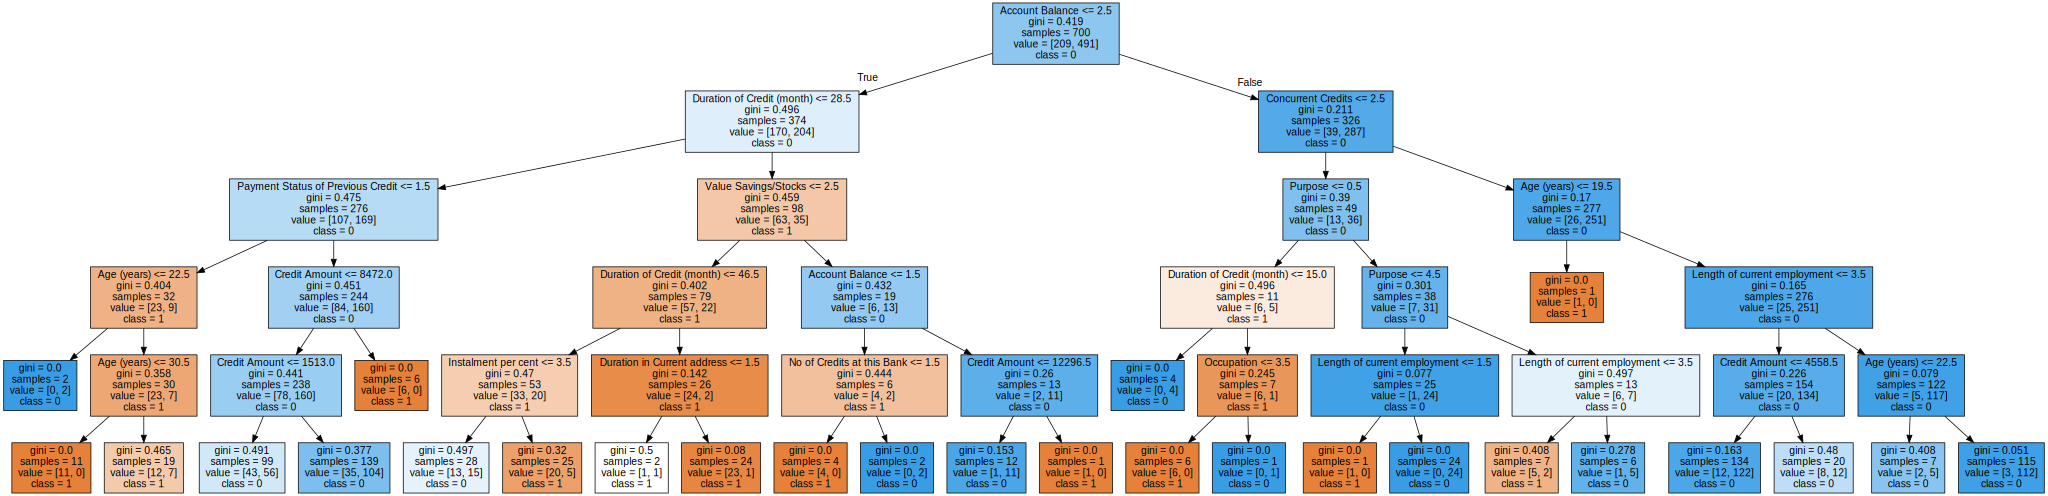

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph



In the tree above, decsion tree used the categorical attribute as numeric attribute and generated results. This is because values in each of the categorical attribute was already encoded as numbers (1,2,3...etc.). This type of categorical encoding to numeric values is called Label encoding. It is valid to use this sort of method but it has a disadvantage that higher number could mean bigger weight for a value but it may just be a different value. We shall see another method to avoid this below. If we had strings in values, then the above code would have generated an error. Recall that decision tree algorithm can handle categorical and numerical data but Sklearn's implementation can only handle numeric data types. So it is not a comprehensive implementation of decision tree. 

In [ ]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



**In a similar way, we can train and test Naive Bayes**

Multinomial Naive Bayes is the Naive Bayes type we studied in the class. Recall that the NB that we studied measures the conditional probabilites of words by using their counts/frequencies in each document . In the lab 6, you used CountVectorizer class in Sklearn pacakge to convert documents and words into a table/matrix where each column represented a word and each row represented a document. In the case of the dataset that we are using now, it is already in the form of a table/matrix. Each row represents one record (a kinda document) and each column represents one attribute (a kinda word). After the matrix of frequencies, remaining process is the same.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


Let's understand our Naive Bayes model

In [ ]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.66053824 -5.09289346 -7.52920224 -7.2442712  -0.02385625 -7.77176387
  -7.16792253 -7.18335493 -7.34322437 -8.16470272 -7.27277271 -7.3616411
  -4.77281549 -7.37473764 -7.66053824 -7.98653918 -7.23113472 -8.16470272
  -7.97617639 -8.28352364]
 [-6.96381256 -5.09018055 -7.03265538 -7.02592638 -0.03094527 -7.19521844
  -6.79713562 -6.95892257 -7.02443718 -7.89278845 -6.9965557  -7.21662871
  -4.4432513  -7.02816435 -7.36613136 -7.65976479 -6.96451308 -7.8874834
  -7.68825674 -7.98173594]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too. For now, let's see classification report.

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.39      0.41      0.40        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.63      0.63       300



# Section 2: Categorical to One-Hot (numeric) Encoding 
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [12]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
#cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
 #         ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
  #        "Telephone","Foreign Worker"]
#*******
#for bank dataset uncomment following line
#cat_cols=["job","marital","education","default","housing","loan","contact","month","poutcome"]
#*******
#*******
# for Churn data set uncomment following line
cat_cols=["State","Area Code", "Phone Number", "Inter Plan","VoiceMail Plan"]
#******


In [13]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


Account Length  No of Vmail Mesgs  Total Day Min  Total Day calls  \
0              107.0               26.0          161.6            123.0   
1              137.0                0.0          243.4            114.0   
2               84.0                0.0          299.4             71.0   
3               75.0                0.0          166.7            113.0   
4              118.0                0.0          223.4             98.0   
...              ...                ...            ...              ...   
3328            68.0                0.0          231.1             57.0   
3329            28.0                0.0          180.8            109.0   
3330           184.0                0.0          213.8            105.0   
3331            74.0               25.0          234.4            113.0   
3332           128.0               25.0          265.1            110.0   

      Total Day Charge  Total Evening Min  Total Evening Calls  \
0                27.47              195.5                103.0   
1                41.38              121.2                110.0   
2                50.90               61.9                 88.0   
3                28.34              148.3                122.0   
4                37.98              220.6                101.0   
...                ...                ...                  ...   
3328             39.29              153.4                 55.0   
3329             30.74              288.8                 58.0   
3330             36.35              159.6                 84.0   
3331             39.85              265.9                 82.0   
3332             45.07              197.4                 99.0   

      Total Evening Charge  Total Night Minutes  Total Night Calls  ...  \
0                    16.62                254.4              103.0  ...   
1                    10.30                162.6              104.0  ...   
2                     5.26                196.9               89.0  ...   
3                    12.61                186.9              121.0  ...   
4                    18.75                203.9              118.0  ...   
...                    ...                  ...                ...  ...   
3328                 13.04                191.3              123.0  ...   
3329                 24.55                191.9               91.0  ...   
3330                 13.57                139.2              137.0  ...   
3331                 22.60                241.4               77.0  ...   
3332                 16.78                244.7               91.0  ...   

      Phone Number_422-6690  Phone Number_422-7728  Phone Number_422-8268  \
0                         0                      0                      0   
1                         0                      0                      0   
2                         0                      0                      0   
3                         0                      0                      0   
4                         0                      0                      0   
...                     ...                    ...                    ...   
3328                      0                      0                      0   
3329                      0                      0                      0   
3330                      0                      0                      0   
3331                      0                      0                      0   
3332                      0                      0                      0   

      Phone Number_422-8333  Phone Number_422-8344 Phone Number_422-9964  \
0                         0                      0                     0   
1                         0                      0                     0   
2                         0                      0                     0   
3                         0                      0                     0   
4                         0                      0                     0   
...                     ...   

In [ ]:
####
## For Bank data set only
####
# in the case of bank data set, pdays and balance columns have negative values. Those columns won't work with Naive Bayes. So run the following
# line of code for bank data set to make negative values to 0. Note that it is not necessary for decision tree to remove negative values.
#df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)
#df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)


In [14]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
#class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
# class_col_name="y"
# Uncomment following line for class name for Churn dataset
class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [15]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [17]:
#print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Classes  ['FALSE' 'TRUE']
Number of records for classes  [2000.  333.]
Log prior probability for classes  [-0.15400781 -1.94676778]
Log conditional probability for each feature given a class
 [[-2.35240444 -4.81236658 -1.8039874  ... -9.66722848 -7.32471068
  -8.18058615]
 [-2.38746885 -5.36209714 -1.70638185 ... -8.24401576 -7.2151181
  -8.7786926 ]]


We have probailities of a lot more features now.

See evaluation metrics below.

In [18]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[758  92]
 [ 84  66]]
TP:  66 , FP:  92 , TN:  758 , FN: 84


In [23]:
from sklearn.metrics import classification_report
from sklearn import metrics
print ("Confusion Matrix NB")
print(classification_report(y_test, y_pred))



Confusion Matrix NB
              precision    recall  f1-score   support

       FALSE       0.94      0.98      0.96       850
        TRUE       0.83      0.64      0.72       150

    accuracy                           0.93      1000
   macro avg       0.89      0.81      0.84      1000
weighted avg       0.92      0.93      0.92      1000



**Let's run decision tree on one-hot encoded data**

class Names ['FALSE' 'TRUE']


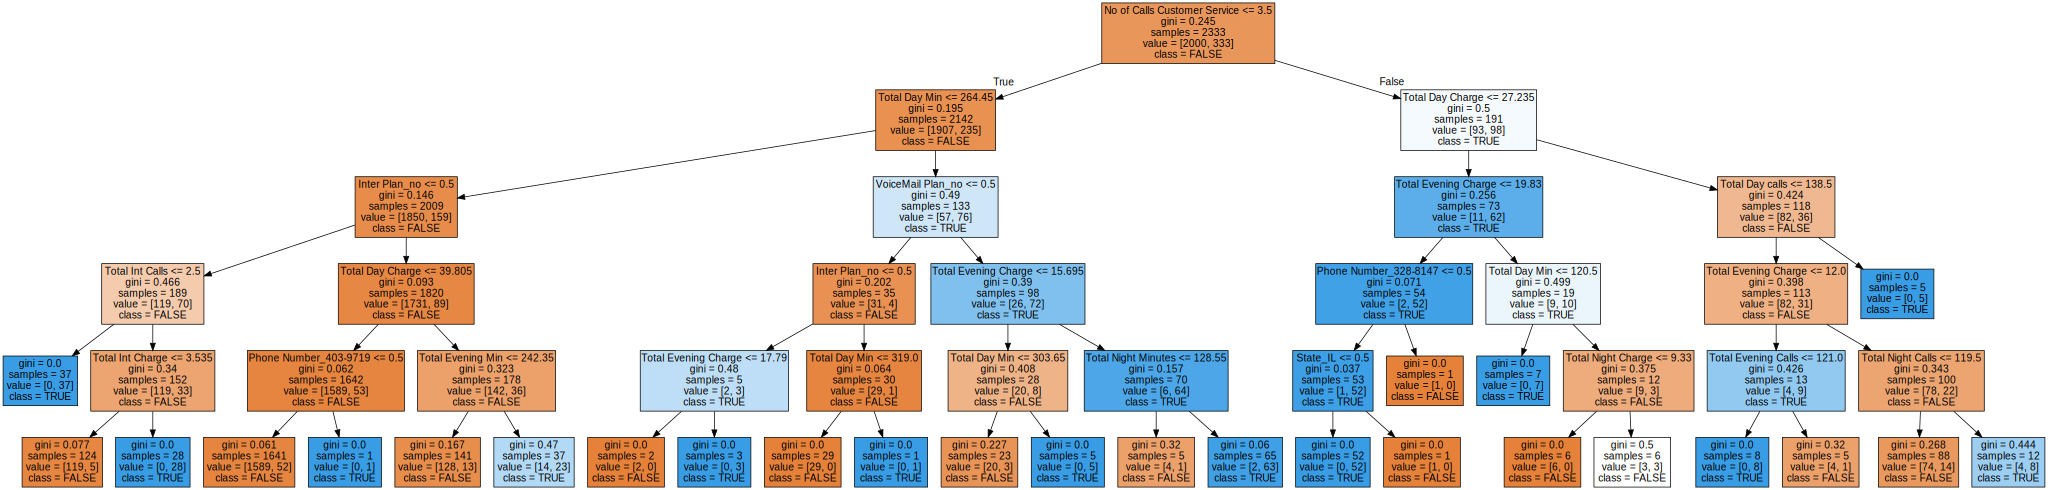

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [21]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [24]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics
print ("Confusion Matrix DT")
print(classification_report(y_test, y_pred))


Confusion Matrix DT
              precision    recall  f1-score   support

       FALSE       0.94      0.98      0.96       850
        TRUE       0.83      0.64      0.72       150

    accuracy                           0.93      1000
   macro avg       0.89      0.81      0.84      1000
weighted avg       0.92      0.93      0.92      1000



**Appendix**

**Exploratory Analysis**

We have learnt how to implement classification algorithms in Python but we have just done basic exploratory data analysis in the beginning using info function, describe function,and  head function of Pandas. Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for you. You can analyze mising values, dupicate values, correlation, etc.


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After you have performed exploratory analysis and determined the features or rows you would like to remove (if any) then you can use simple pandas statements to select a subset of data frame. Here is the documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html. For example, if you want to drop a column name "Phone Number" then you can use: 

df=df.drop(columns=['Phone Number'])

Learning Pandas will be useful for you in the long run as it is used everywhere in data science world. After doing any feature selection (or fitering of rows) you can run the above decision tree and Naive Bayes models again for comparison with original data.



```
For CIND 119 course at Ryerson
  by Syed Shariyar Murtaza,Ph.D.
```

